<a href="https://colab.research.google.com/github/darshikavinayakkulkarni/Copy-of-Airbnb-Bookings-Analysis---Capstone-Project.ipynb/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url='https://drive.google.com/file/d/1ioU5r9KEYSfwgfUi22SclVkx4l1a_8ou/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [ ]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
df.shape


(48895, 16)

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.describe(include = object).T


,count,unique,top,freq
name,48879,47905,Hillside Hotel,18
host_name,48874,11452,Michael,417
neighbourhood_group,48895,5,Manhattan,21661
neighbourhood,48895,221,Williamsburg,3920
room_type,48895,3,Entire home/apt,25409
last_review,38843,1764,2019-06-23,1413


In [ ]:
df.describe(include = int).T


,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.0,9471945.0,19677284.0,29152178.5,36487245.0
host_id,48895.0,6.762001e+07,7.861097e+07,2438.0,7822033.0,30793816.0,107434423.0,274321313.0
price,48895.0,1.527207e+02,2.401542e+02,0.0,69.0,106.0,175.0,10000.0
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.0,1.0,3.0,5.0,1250.0
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.0,1.0,5.0,24.0,629.0
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.0,1.0,1.0,2.0,327.0
availability_365,48895.0,1.127813e+02,1.316223e+02,0.0,0.0,45.0,227.0,365.0


In [ ]:
df.describe(include = float).T


,count,mean,std,min,25%,50%,75%,max
latitude,48895.0,40.728949,0.054530,40.49979,40.69010,40.72307,40.763115,40.91306
longitude,48895.0,-73.952170,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
reviews_per_month,38843.0,1.373221,1.680442,0.01000,0.19000,0.72000,2.020000,58.50000


In [ ]:
df['last_review']= pd.to_datetime(df['last_review'])


In [ ]:
#1. List the room available for 365 days.


In [ ]:
df.availability_365.value_counts()

0      17533
365     1295
364      491
1        408
89       361
       ...  
195       26
183       24
196       24
181       23
202       20
Name: availability_365, Length: 366, dtype: int64

We listed available days of the rooms so our conclusion is there are 17533 rooms available for 0 days.

In [ ]:
#2 which host having maximum reviews?


In [ ]:
max_reviews=df.number_of_reviews.max()
max_host = df[df['number_of_reviews']==max_reviews]['host_name']
print(max_host,max_reviews)

11759    Dona
Name: host_name, dtype: object 629


The Dona have maximum number of reviews around 629

In [ ]:
#3. Which location have maximum hotels?


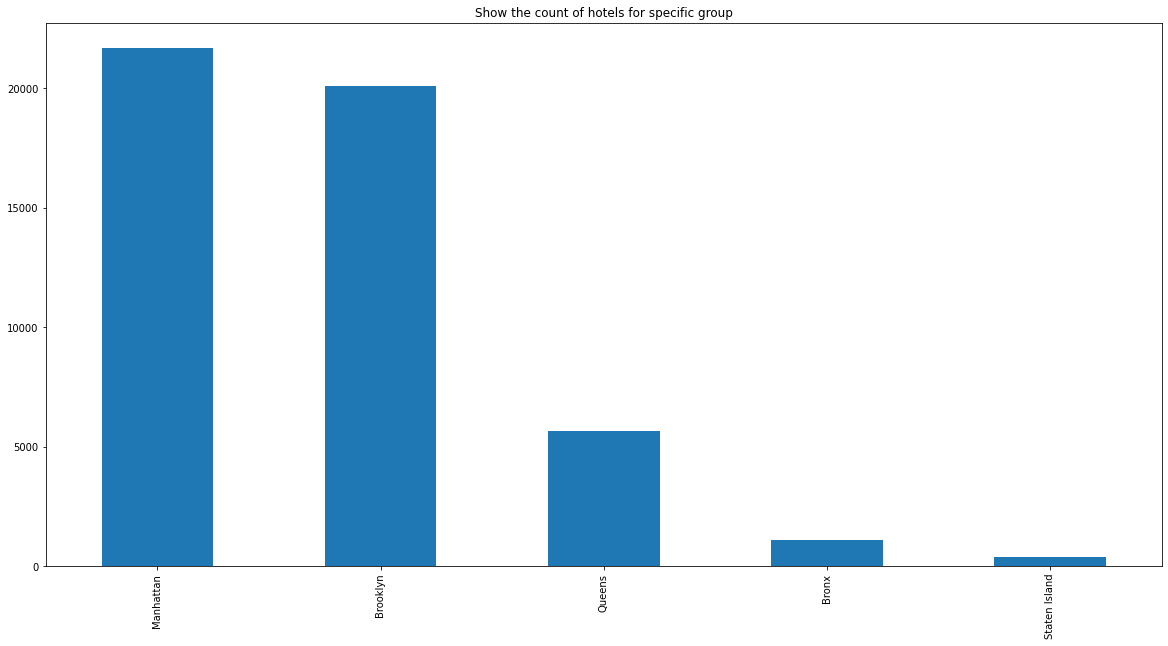

In [ ]:
location_per_count = df['neighbourhood_group'].value_counts().plot(kind='bar',
                                    figsize=(20,10),
                                    title="Show the count of hotels for specific group")


In [ ]:
#4.which room type have maximum preference?


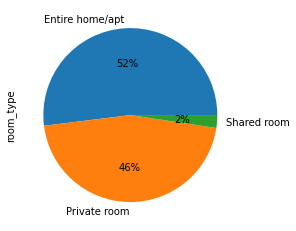

In [ ]:
room_preference = df.room_type.value_counts().plot(
    kind='pie', y='preferance_of_each_class', autopct='%1.0f%%')


There are maximum people giving preferences to entire home/apt and its around 52% but similary to private room also its around 46%.
There are very less preference to the shared room and its around 2%.